In [1]:
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import math
import pandas as pd
import importlib.util
import scipy.signal as sci
import numpy.lib.scimath as sp
import sympy as sp
import numpy.polynomial.polynomial as poly

pi = np.pi

# FIR Filter

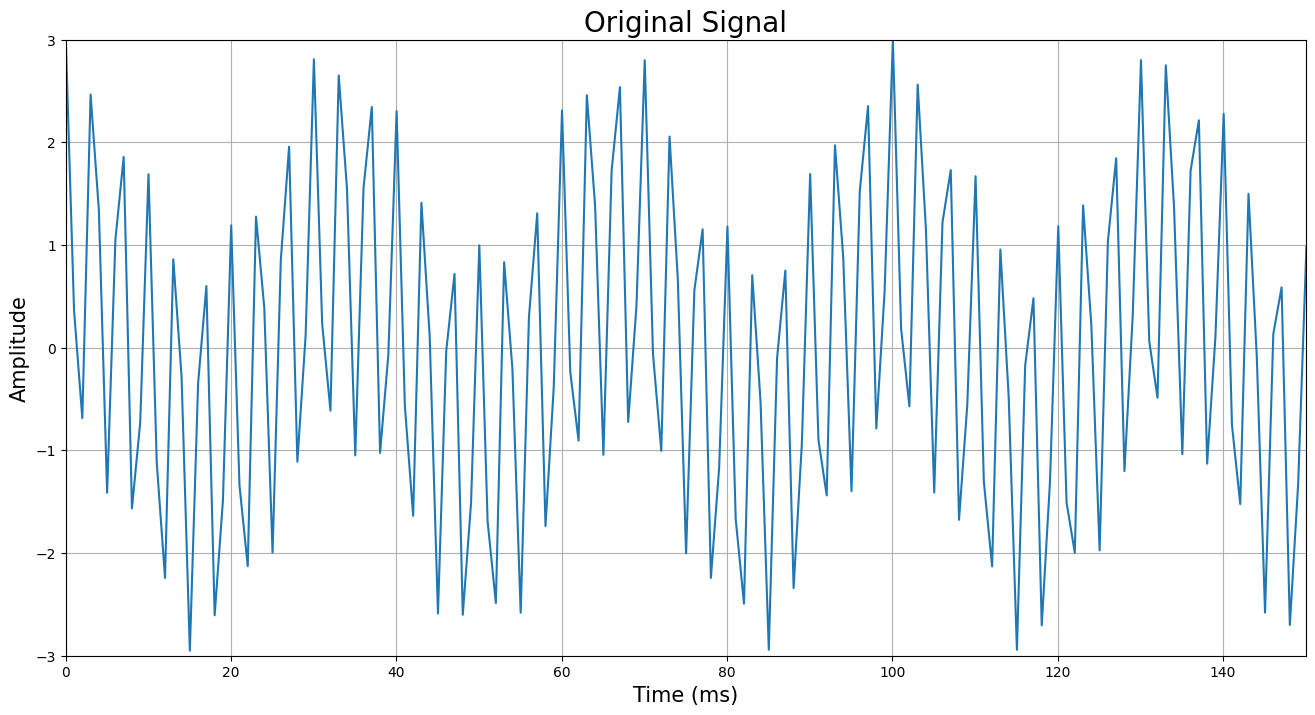

In [2]:
# using 1 second signal
fs = 2000
fc = 100
wc = 2*pi*fc/fs
samples = fs
t = np.linspace(0, samples, samples)

signal = np.cos(2*pi*60*t) + 2*np.cos(2*pi*600*t)

figure1 = plt.figure(figsize=(16,8))
plt.plot(t,signal)
plt.xlim(0,150)
plt.ylim(-3,3)
plt.xlabel('Time (ms)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Original Signal', fontsize = 20)
plt.grid()


diferent windows testing

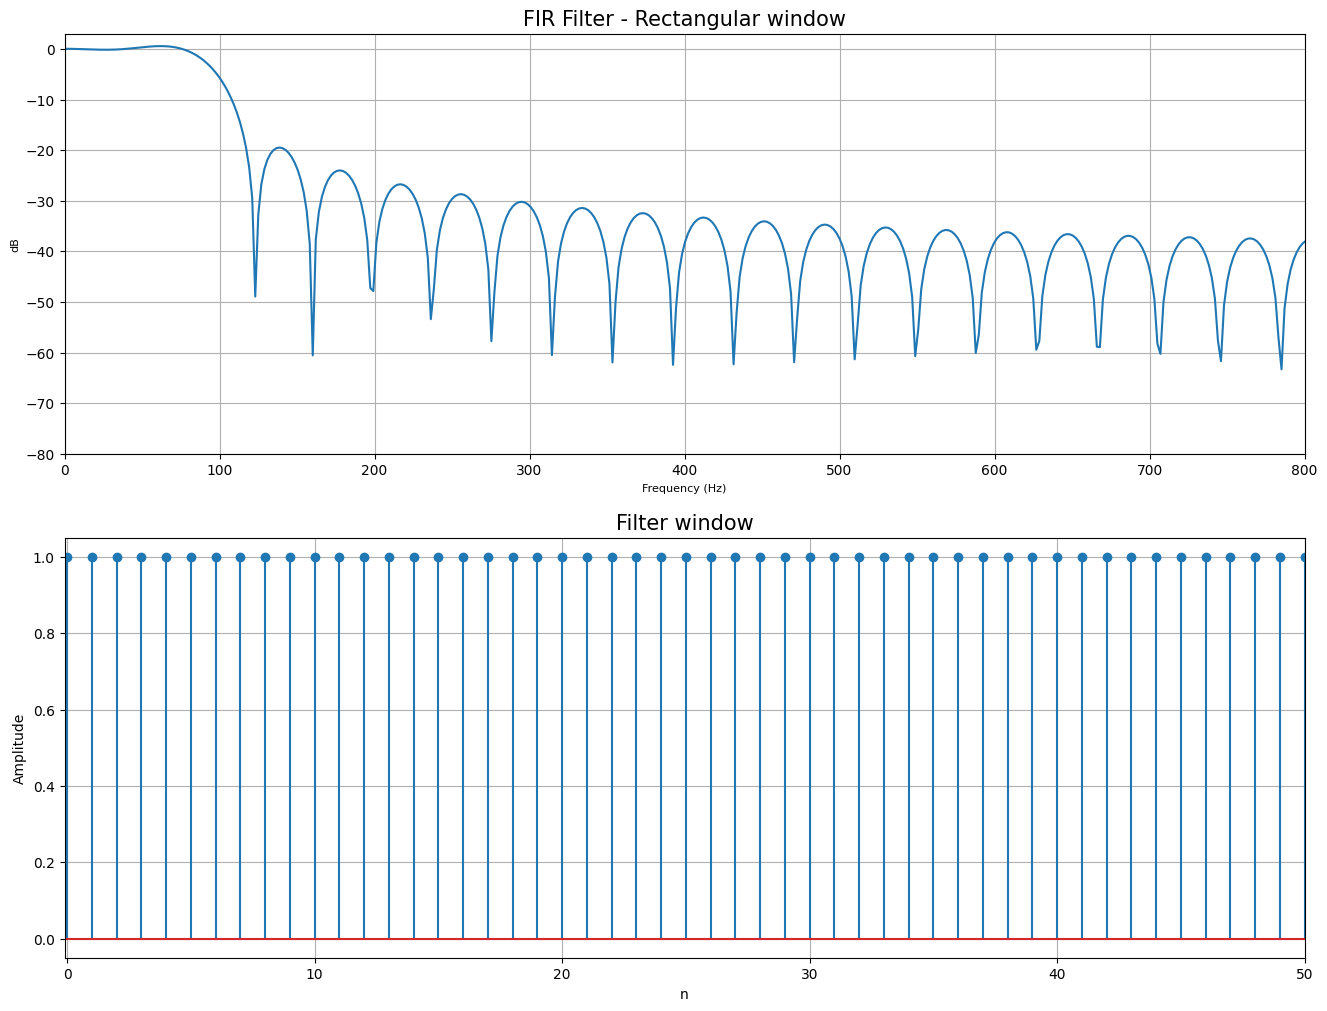

In [3]:
# using rectangular window
N = 50 # choosing the coeficients
M = int(N/2)

w = 1 # creating the window

coeficients = np.zeros(N+1)

for i in range(N+1): # creating the filter
    if i == M:
        coeficients[M] = w*wc/pi # creating the middle term
    else:
        coeficients[i] = w*((np.sin(wc*(i-M)))/(pi*(i-M)))

window = 1+0*t

# plot generation

figure2, ax = plt.subplots(2,1, figsize=(16,12)) 

freq, H = sci.freqz(coeficients, fs=fs)

ax[0].plot(freq, 20*np.log10(abs(H)))
ax[0].set_title('FIR Filter - Rectangular window', size = 15)
ax[0].set_xlabel('Frequency (Hz)', size = 8)
ax[0].set_ylabel('dB', size = 8)
ax[0].set_xlim(0,800)
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_ylim(-80,3)
ax[0].grid()

ax[1].stem(window)
ax[1].set_title('Filter window', size = 15)
ax[1].set_xlabel('n', size = 10)
ax[1].set_ylabel('Amplitude', size = 10)
ax[1].set_xlim(-0.1,50)
ax[1].grid()

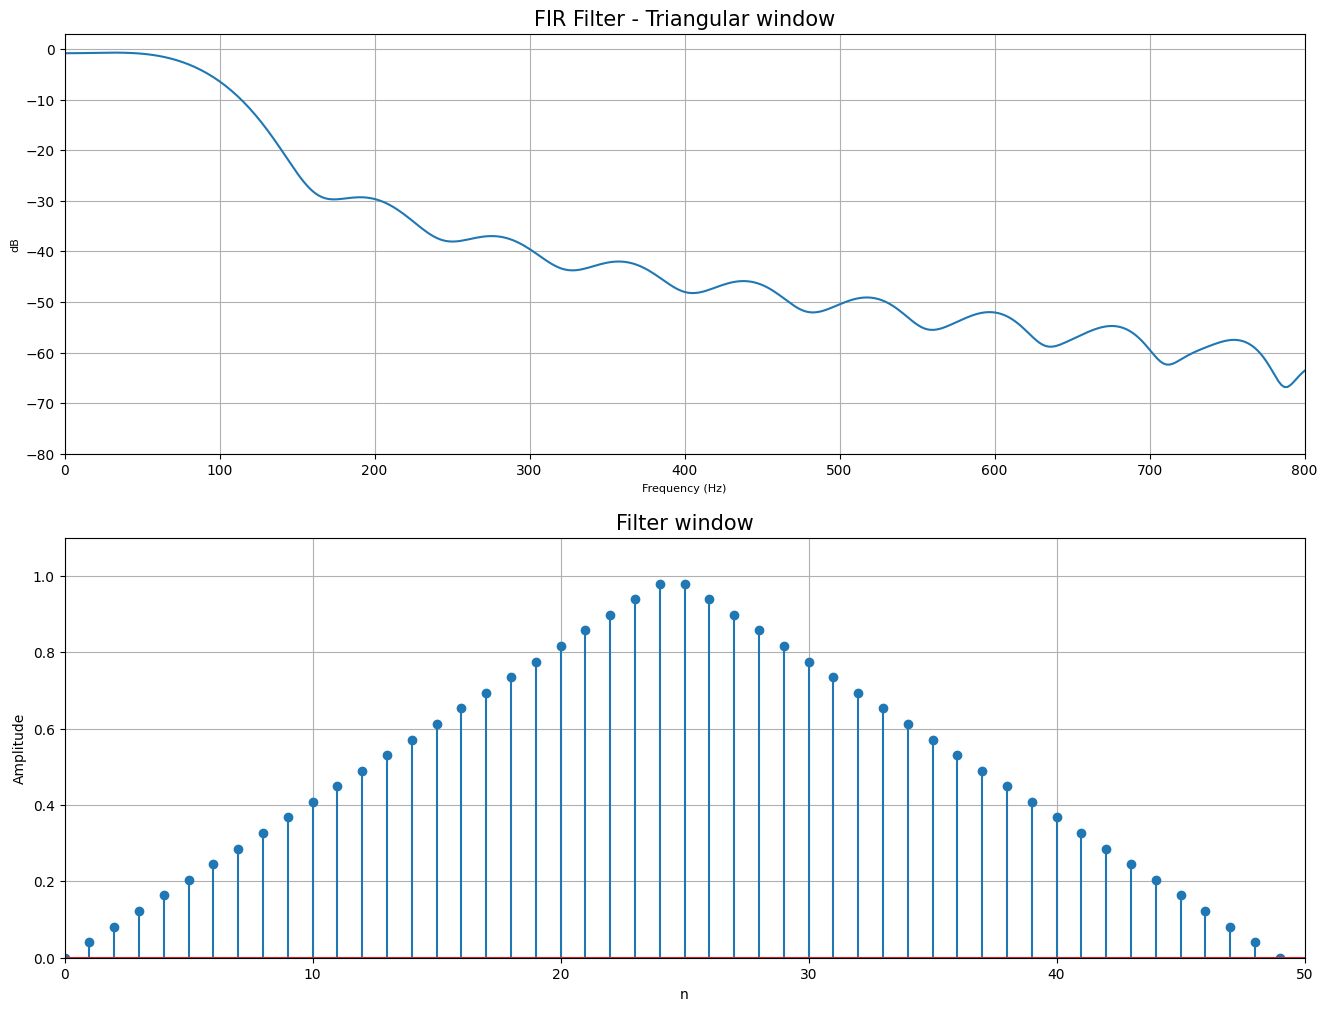

In [4]:
# using triangular window
N = 50 # choosing the coeficients
M = int(N/2)

w = np.zeros(N+1)

for i in range(N+1): # creating the window
    if i<=((N-1)/2):
        w[i] = 2*i/(N-1) # creating the middle term
    else:
        w[i] = 2-(2*i)/(N-1)

coeficients = np.zeros(N+1)

for i in range(N+1): # creating the filter
    if i == M:
        coeficients[M] = w[i]*wc/pi # creating the middle term
    else:
        coeficients[i] = w[i]*((np.sin(wc*(i-M)))/(pi*(i-M)))

# plot generation

figure3, ax = plt.subplots(2,1, figsize=(16,12)) 

ffreq, H = sci.freqz(coeficients, fs=fs)

ax[0].plot(ffreq, 20*np.log10(abs(H)))
ax[0].set_title('FIR Filter - Triangular window', size = 15)
ax[0].set_xlabel('Frequency (Hz)', size = 8)
ax[0].set_ylabel('dB', size = 8)
ax[0].set_xlim(0,800)
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_ylim(-80,3)
ax[0].grid()

ax[1].stem(w)
ax[1].set_title('Filter window', size = 15)
ax[1].set_xlabel('n', size = 10)
ax[1].set_ylabel('Amplitude', size = 10)
ax[1].set_xlim(0,50)
ax[1].set_ylim(0,1.1)
ax[1].grid()

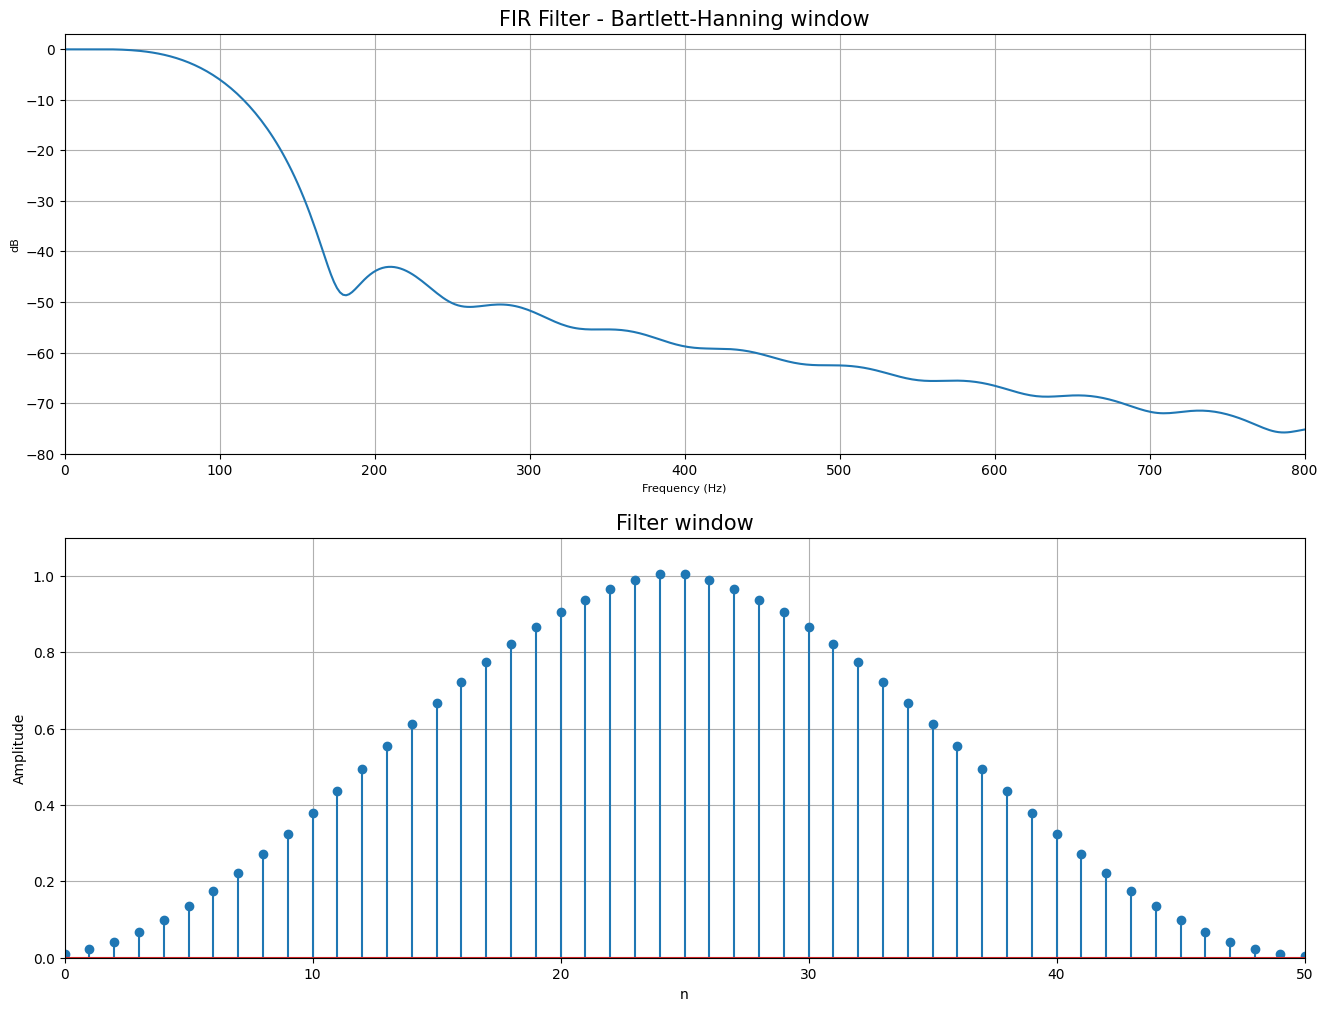

In [5]:
# using Bartlett-Hanning window
N = 50 # choosing the coeficients
M = int(N/2)

w = np.zeros(N+1)

for i in range(N+1): # creating the window
    w[i] = 0.63-0.48*(abs(i/(N-1) - 0.5)) + 0.38*np.cos(2*pi*(i/(N-1) - 0.5))

coeficients = np.zeros(N+1)

for i in range(N+1): # creating the filter
    if i == M:
        coeficients[M] = w[i]*wc/pi # creating the middle term
    else:
        coeficients[i] = w[i]*((np.sin(wc*(i-M)))/(pi*(i-M)))

# plot generation

figure4, ax = plt.subplots(2,1, figsize=(16,12)) 

freq, H = sci.freqz(coeficients, fs=fs)

ax[0].plot(freq, 20*np.log10(abs(H)))
ax[0].set_title('FIR Filter - Bartlett-Hanning window', size = 15)
ax[0].set_xlabel('Frequency (Hz)', size = 8)
ax[0].set_ylabel('dB', size = 8)
ax[0].set_xlim(0,800)
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_ylim(-80,3)
ax[0].grid()

ax[1].stem(w)
ax[1].set_title('Filter window', size = 15)
ax[1].set_xlabel('n', size = 10)
ax[1].set_ylabel('Amplitude', size = 10)
ax[1].set_xlim(0,N)
ax[1].set_ylim(0,1.1)
ax[1].grid()

Optimizing the Bartlett-Hanning window filter

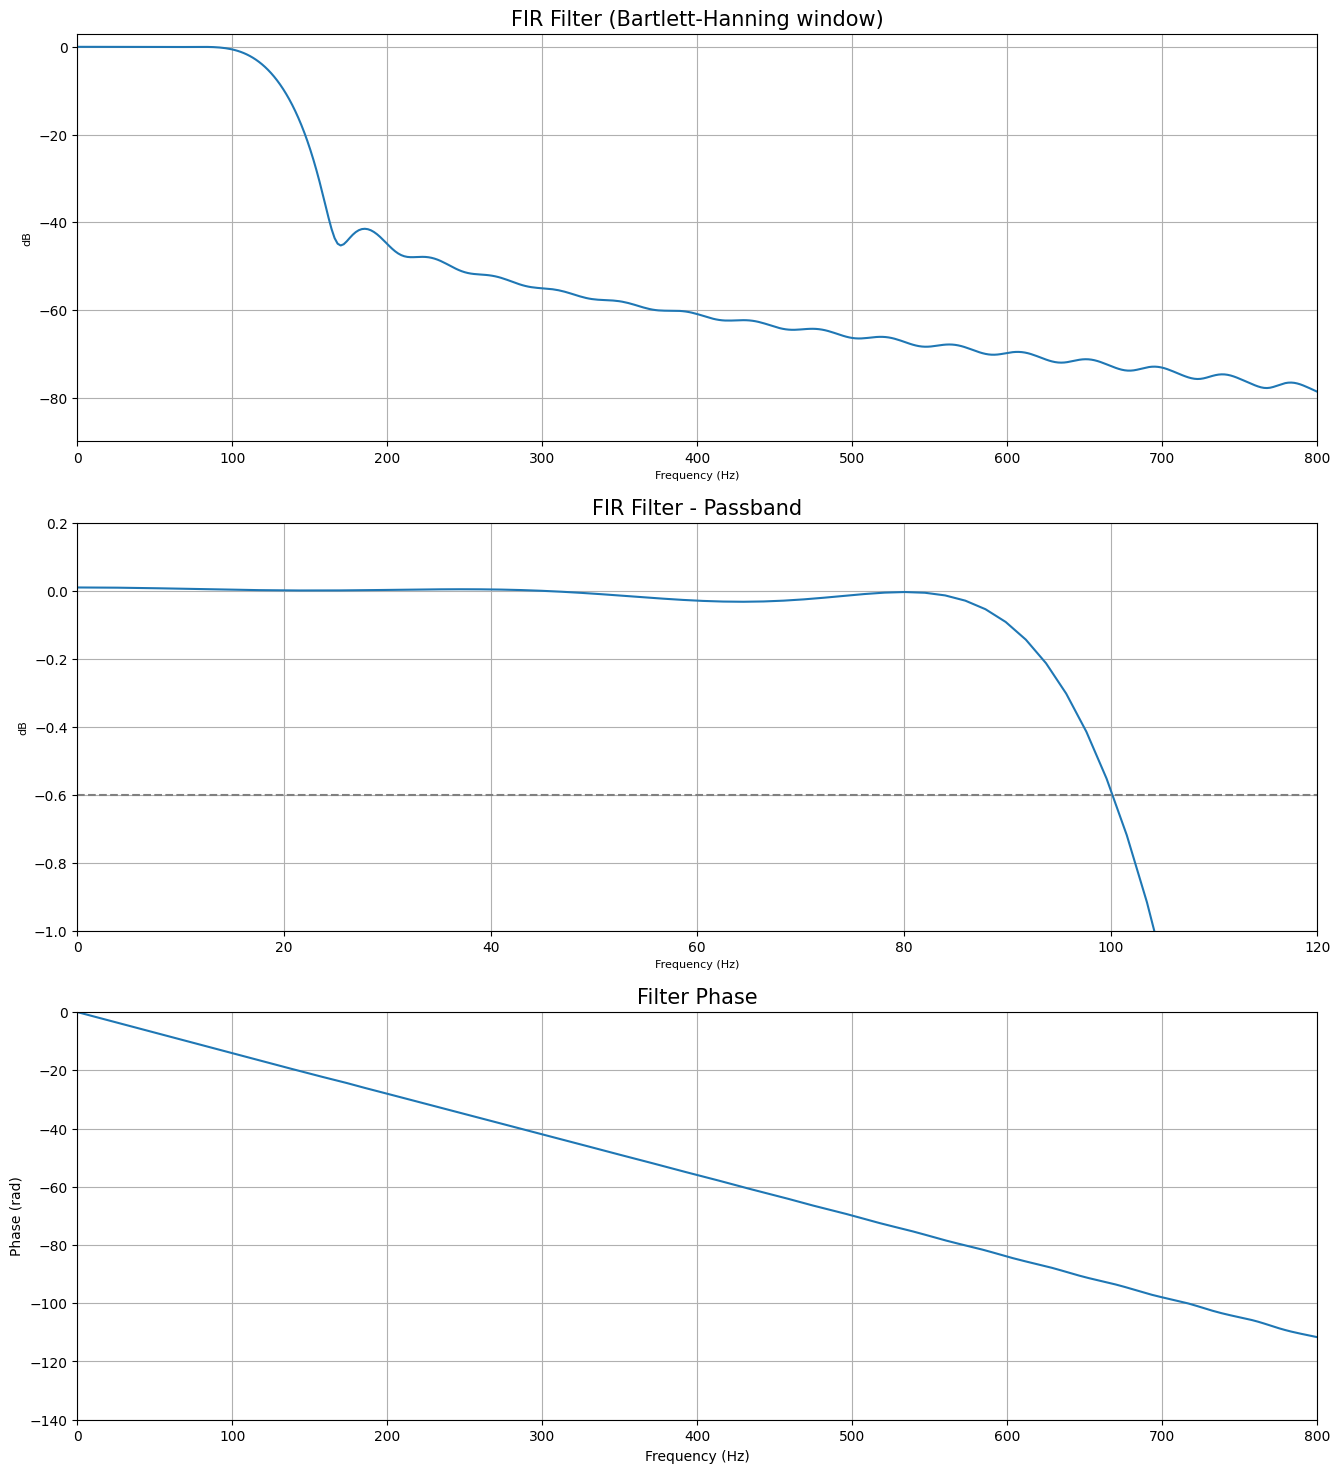

In [6]:
fs = 2000
fc = 125
wc = 2*pi*fc/fs
samples = fs
t = np.linspace(0, samples, samples)

signal = np.cos(2*pi*60*t) + 2*np.cos(2*pi*600*t)

# using Bartlett-Hanning window
N = 90 # choosing the coeficients
M = int(N/2)

w = np.zeros(N+1)

for i in range(N+1): # creating the window
    w[i] = 0.63-0.48*(abs(i/(N-1) - 0.5)) + 0.38*np.cos(2*pi*(i/(N-1) - 0.5))

coeficients = np.zeros(N+1)

for i in range(N+1): # creating the filter
    if i == M:
        coeficients[M] = w[i]*wc/pi # creating the middle term
    else:
        coeficients[i] = w[i]*((np.sin(wc*(i-M)))/(pi*(i-M)))

# plot generation

figure5, ax = plt.subplots(3,1, figsize=(16,18)) 

freq, H = sci.freqz(coeficients, fs=fs)

phase = np.angle(H)
p = np.angle(signal)

ax[0].plot(freq, 20*np.log10(abs(H)))
ax[0].set_title('FIR Filter (Bartlett-Hanning window)', size = 15)
ax[0].set_xlabel('Frequency (Hz)', size = 8)
ax[0].set_ylabel('dB', size = 8)
ax[0].set_xlim(0,800)
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_ylim(-90,3)
ax[0].grid()

ax[1].plot(freq, 20*np.log10(abs(H)))
ax[1].set_title('FIR Filter - Passband', size = 15)
ax[1].set_xlabel('Frequency (Hz)', size = 8)
ax[1].set_ylabel('dB', size = 8)
ax[1].set_xlim(0,120)
ax[1].axhline(-0.6, linestyle = '--', color = 'grey')
ax[1].set_ylim(-1,0.2)
ax[1].grid()


ax[2].plot(freq, np.unwrap(phase))
ax[2].set_title('Filter Phase',  size = 15)
ax[2].set_xlabel('Frequency (Hz)', size = 10)
ax[2].set_ylabel('Phase (rad)', size = 10)
ax[2].set_xlim(0,800)
ax[2].set_ylim(-140,0)
ax[2].grid()

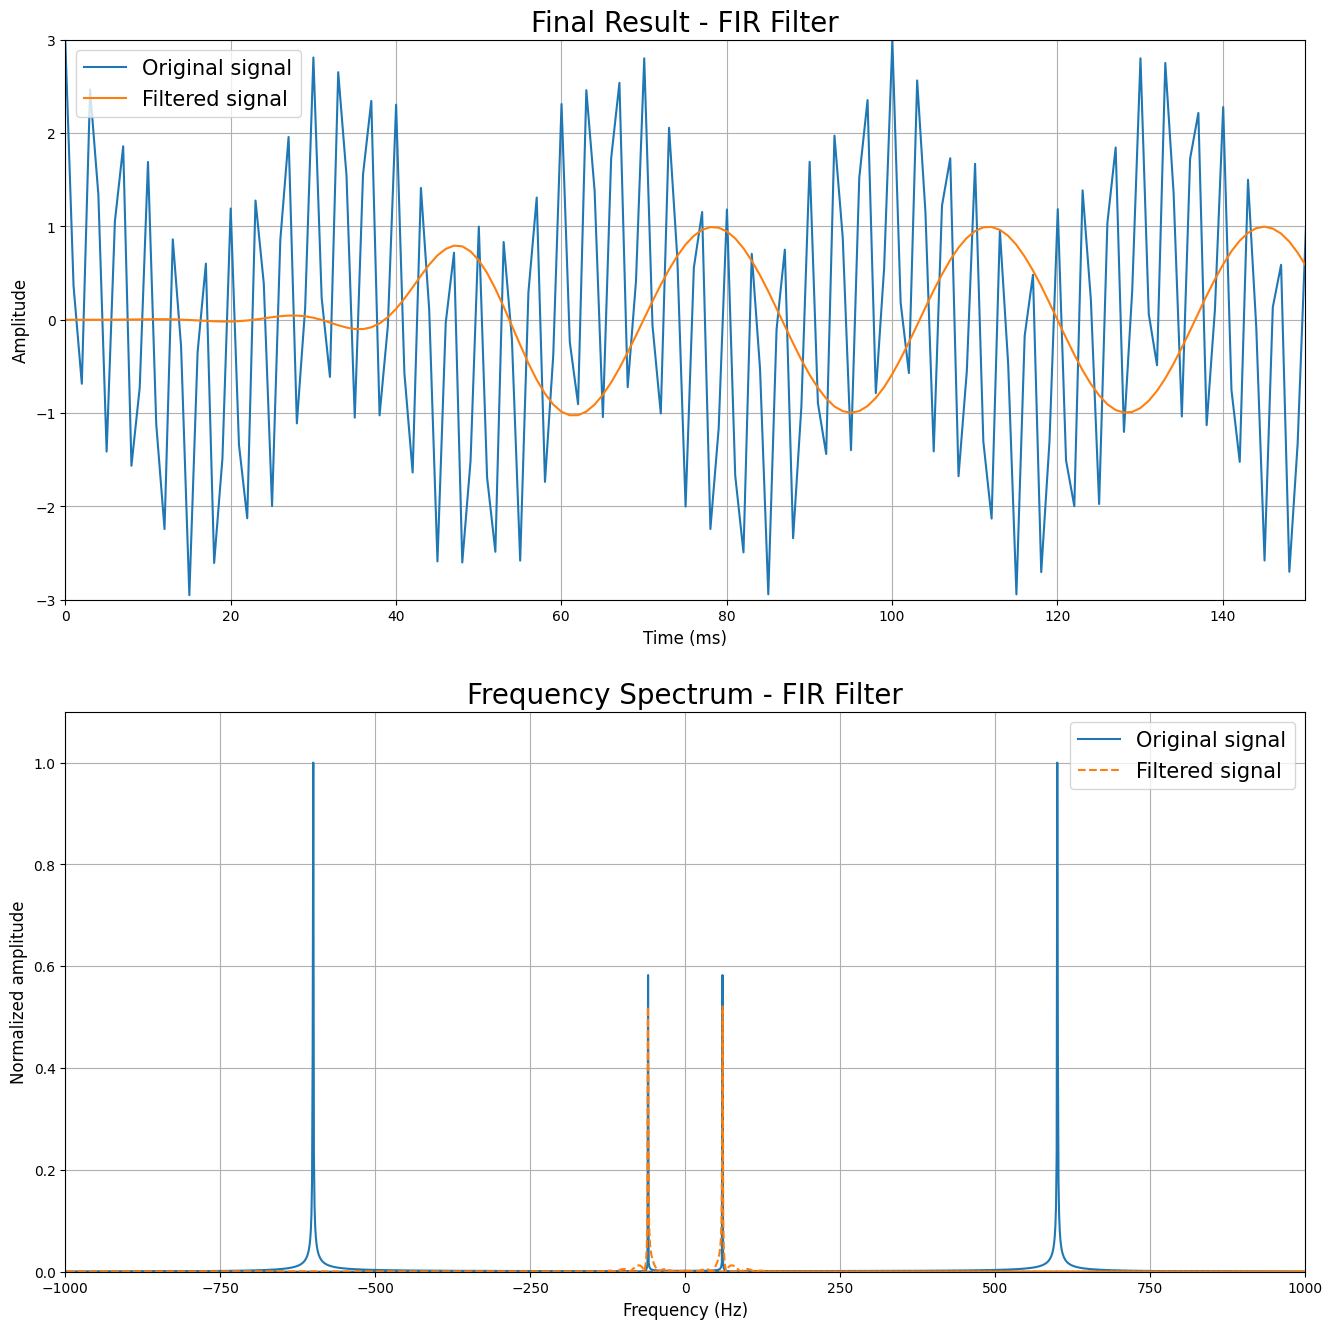

In [18]:
result = sci.fftconvolve(signal,coeficients)

fft_result = np.fft.fft(result)
f_result = np.fft.fftfreq(len(result), 1/fs)

fft_signal = np.fft.fft(signal)
f_signal = np.fft.fftfreq(len(signal), 1/fs)

figure6, ax = plt.subplots(2,1, figsize=(16,16))

ax[0].plot(t,signal, label = 'Original signal')
ax[0].plot(t,result[0:2000], label = 'Filtered signal')
ax[0].legend(fontsize = 15)
ax[0].set_xlim(0,150)
ax[0].set_ylim(-3,3)
ax[0].set_xlabel('Time (ms)', fontsize = 12)
ax[0].set_ylabel('Amplitude', fontsize = 12)
ax[0].set_title('Final Result - FIR Filter', fontsize = 20)
ax[0].grid()

ax[1].plot(f_signal, abs(fft_signal)/abs(max(fft_signal)), label = 'Original signal')
ax[1].plot(f_result, abs(fft_result)/abs(max(fft_signal)),'--', label = 'Filtered signal' )
ax[1].legend(fontsize = 15)
ax[1].set_xlim(-1000, 1000)
ax[1].set_ylim(0,1.1)
ax[1].set_xlabel('Frequency (Hz)', fontsize = 12)
ax[1].set_ylabel('Normalized amplitude', fontsize = 12)
ax[1].set_title('Frequency Spectrum - FIR Filter', fontsize = 20)
ax[1].grid()

# IIR Filter


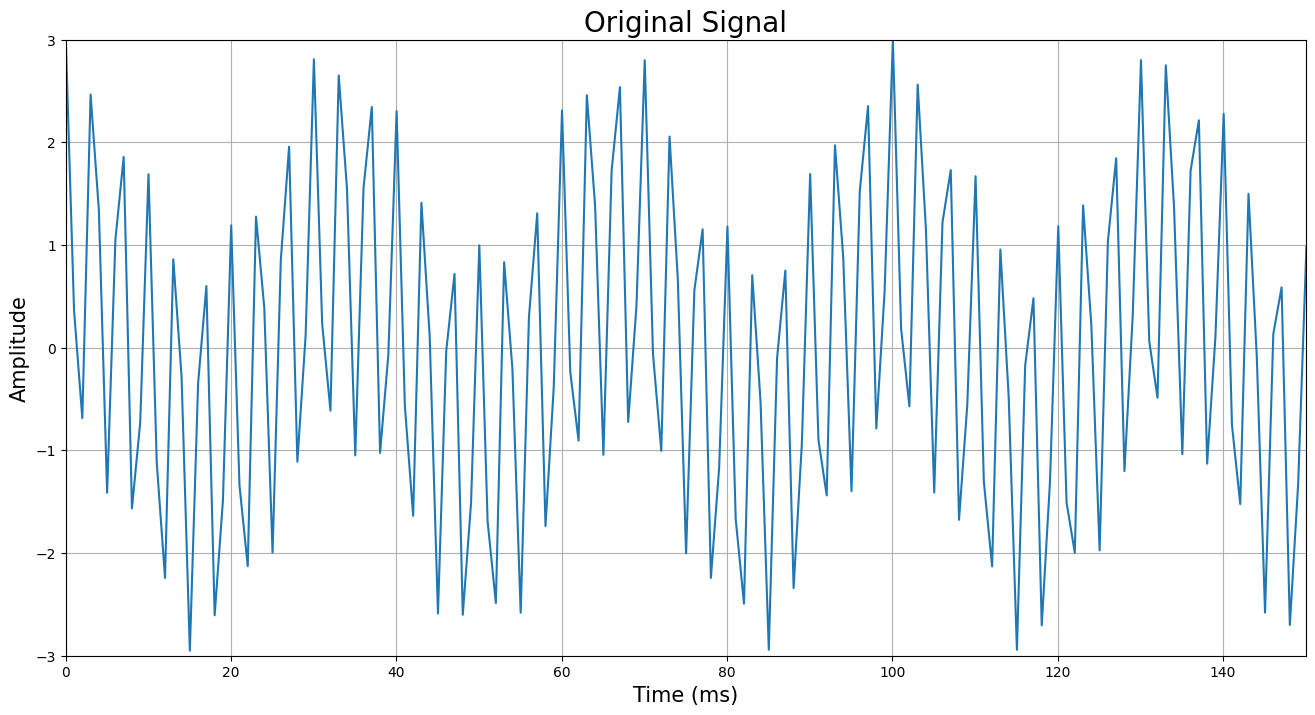

In [8]:
# using 1 second signal
fs = 2000
fpass = 120 # passband frequency
fstop = 400 # stop frequency

Apass = -1 # passband atenuation 
Astop = -60 # stopband atenuation

t = np.linspace(0, fs, fs)

signal = np.cos(2*pi*60*t) + 2*np.cos(2*pi*600*t)

figure7 = plt.figure(figsize=(16,8))
plt.plot(t,signal)
plt.xlim(0,150)
plt.ylim(-3,3)
plt.xlabel('Time (ms)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Original Signal', fontsize = 20)
plt.grid()

In [9]:
passband = np.tan(fpass*pi/fs)
stopband = np.tan(fstop*pi/fs)

N = np.log10(((10**(abs(Astop)/10))-1) / ((10**(abs(Apass)/10))-1)) / (2*np.log10(stopband/passband))
N = int(np.ceil(N)) # this functions calculate the order needed to the IIR filter with the gaved specifications

z = np.zeros(N, dtype=complex)
for i in range(N):
    z[i] = passband*np.exp(1j*pi*(1/2 + ((2*i+1)/(2*N)))) 

zeros = np.zeros(N+1, dtype=complex)
zeros = poly.polypow([1,1],N)
zeros = (zeros*(passband**N))*(-1**N)/(np.prod(1-z)) # generate the zeros of the transference Function

p = np.ones([N,2], dtype=complex)
for i in range(N):
    p[i,1] = -(1+z[i])/(1-z[i])

poles = np.array([1,0], dtype =complex)
for i in range(N):
    poles = np.polymul(poles,p[i,:])
poles = poles[0:N+1] # generate the poles of the transference Function


# calculate the filter results with the generated data
result = sci.lfilter(zeros, poles, signal)
freq, filter = sci.freqz(zeros, poles, fs=fs)
phase = np.angle(filter)

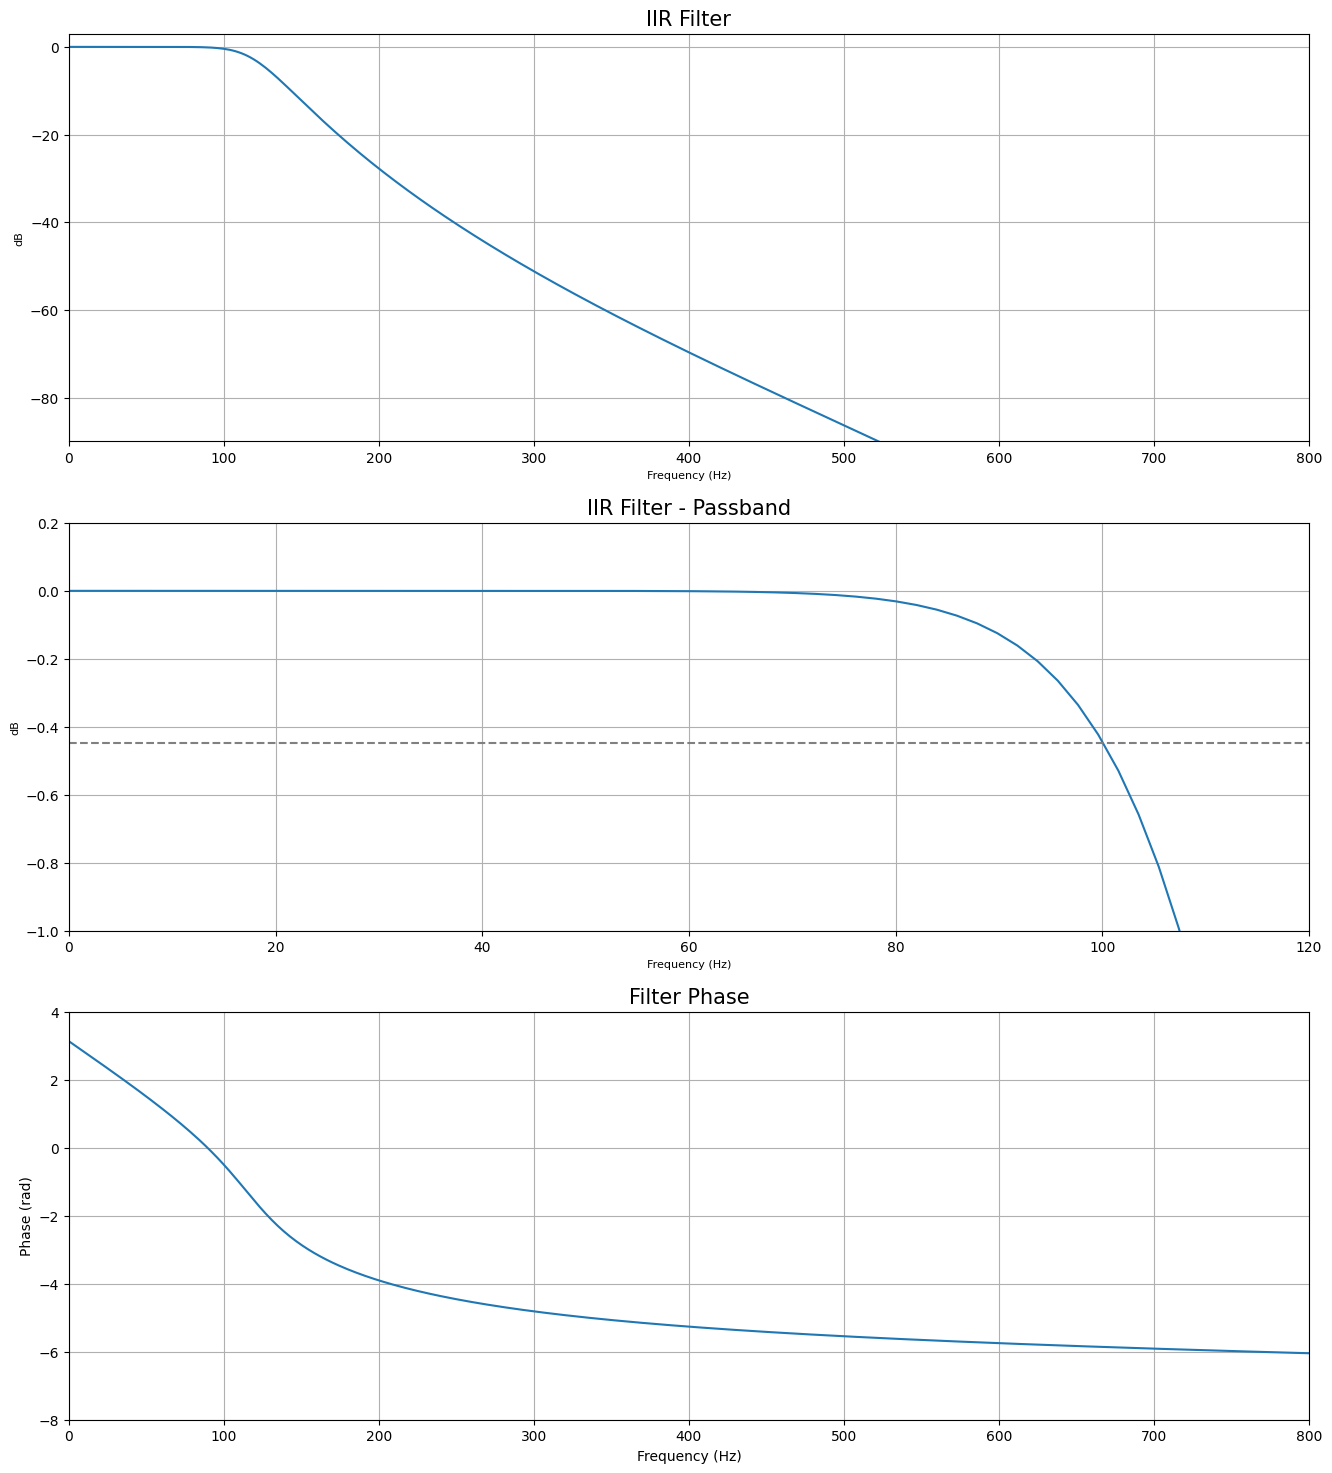

In [10]:
figure8, ax = plt.subplots(3,1, figsize=(16,18)) 

ax[0].plot(freq, 20*np.log10(abs(filter)))
ax[0].set_title('IIR Filter', size = 15)
ax[0].set_xlabel('Frequency (Hz)', size = 8)
ax[0].set_ylabel('dB', size = 8)
ax[0].set_xlim(0,800)
ax[0].set_xticks([0,100,200,300,400,500,600,700,800])
ax[0].set_ylim(-90,3)
ax[0].grid()

ax[1].plot(freq, 20*np.log10(abs(filter)))
ax[1].set_title('IIR Filter - Passband', size = 15)
ax[1].set_xlabel('Frequency (Hz)', size = 8)
ax[1].set_ylabel('dB', size = 8)
ax[1].set_xlim(0,120)
ax[1].axhline(-0.4475, linestyle = '--', color = 'grey')
ax[1].set_ylim(-1,0.2)
ax[1].grid()


ax[2].plot(freq, np.unwrap(phase))
ax[2].set_title('Filter Phase',  size = 15)
ax[2].set_xlabel('Frequency (Hz)', size = 10)
ax[2].set_ylabel('Phase (rad)', size = 10)
ax[2].set_xlim(0,800)
ax[2].set_ylim(-8,4)
ax[2].grid()

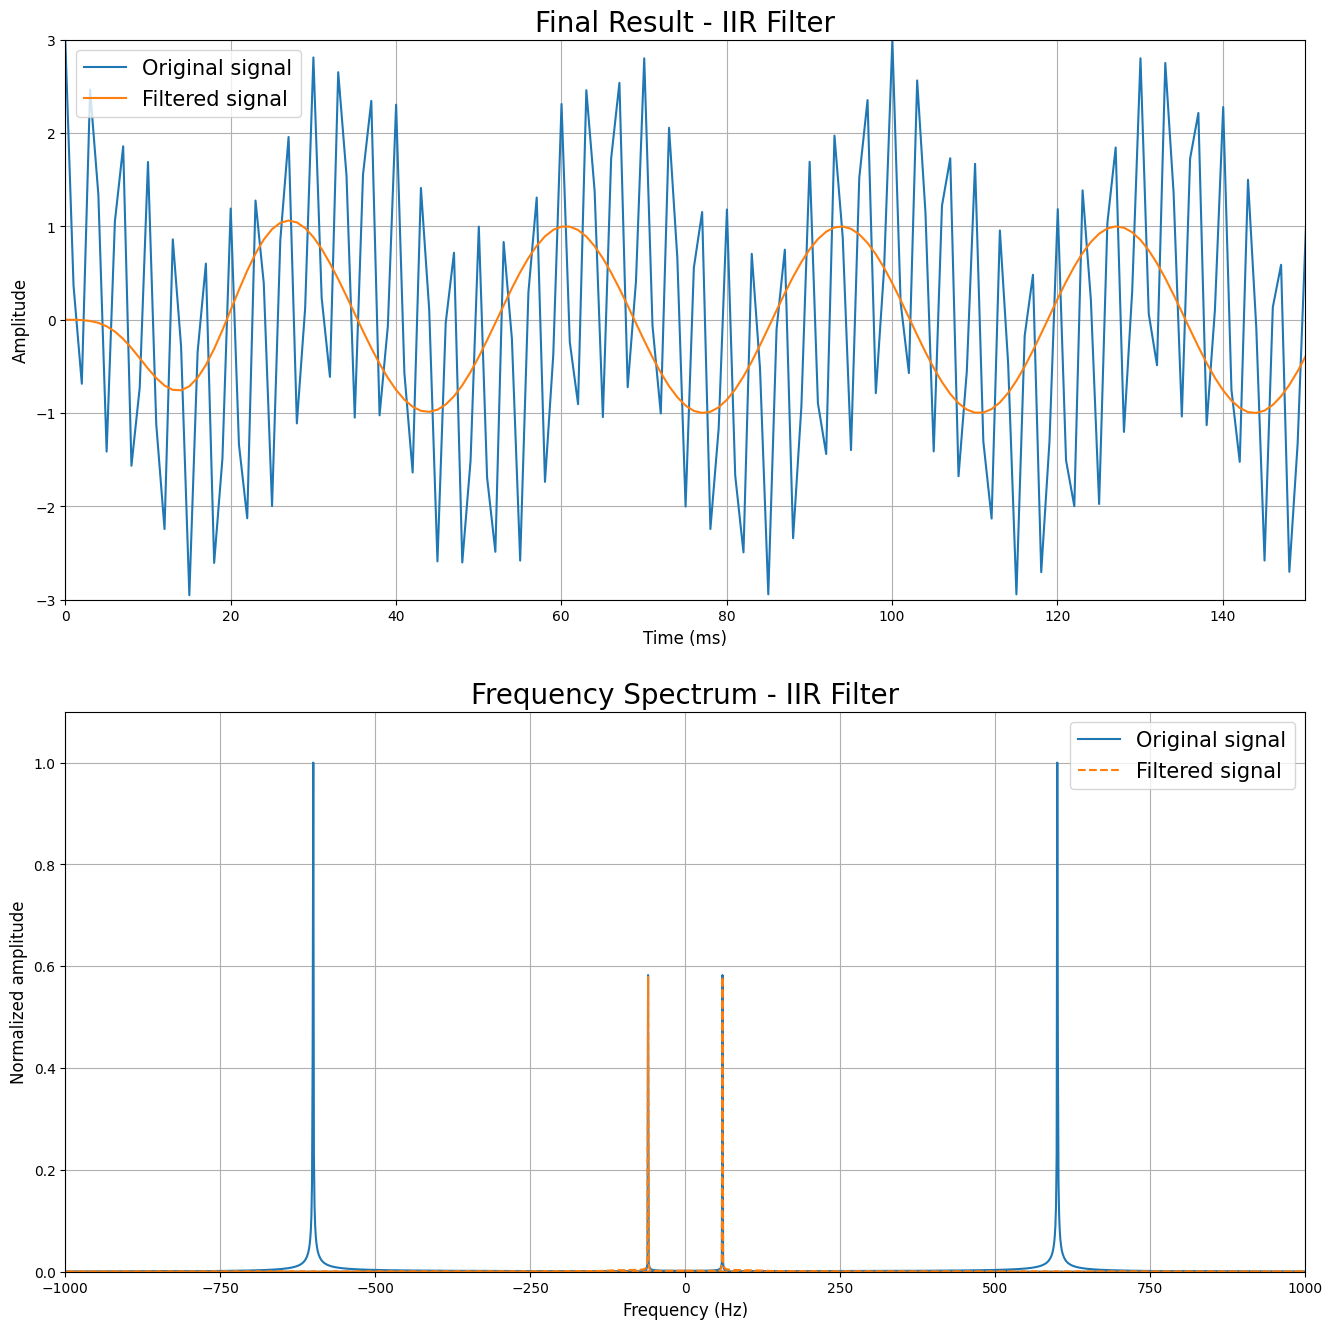

In [11]:
result = sci.fftconvolve(signal,result)
s = sci.lfilter(zeros, poles, signal)

figure9, ax = plt.subplots(2, 1, figsize=(16,16))

fft_result = np.fft.fft(s)
f_result = np.fft.fftfreq(len(s), 1/fs)

fft_signal = np.fft.fft(signal)
f_signal = np.fft.fftfreq(len(signal), 1/fs)

ax[0].plot(t,signal, label = 'Original signal')
ax[0].plot(t,np.real(s), label = 'Filtered signal')
ax[0].legend(fontsize = 15)
ax[0].set_xlim(0,150)
ax[0].set_ylim(-3,3)
ax[0].set_xlabel('Time (ms)', fontsize = 12)
ax[0].set_ylabel('Amplitude', fontsize = 12)
ax[0].set_title('Final Result - IIR Filter', fontsize = 20)
ax[0].grid()

ax[1].plot(f_signal, abs(fft_signal)/abs(max(fft_signal)), label = 'Original signal')
ax[1].plot(f_result, abs(fft_result)/abs(max(fft_signal)),'--', label = 'Filtered signal' )
ax[1].legend(fontsize = 15)
ax[1].set_xlim(-1000, 1000)
ax[1].set_ylim(0,1.1)
ax[1].set_xlabel('Frequency (Hz)', fontsize = 12)
ax[1].set_ylabel('Normalized amplitude', fontsize = 12)
ax[1].set_title('Frequency Spectrum - IIR Filter', fontsize = 20)
ax[1].grid()